---
title: "Demonstration of the Frank-Wolfe methods"
author: "Saikat Banerjee"
format:
  html: 
      theme: default
      code-fold: show
date: "2023-08-04"
file-modified: "2023-08-04"
abstract: "Simple example of using the Frank-Wolfe methods on simulated data."

---

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from pymir import mpl_stylesheet
from pymir import mpl_utils

mpl_stylesheet.banskt_presentation(splinecolor = 'black', dpi = 120, colors = 'kelly')

import sys
sys.path.append("../utils/")
import histogram as mpy_histogram
import simulate as mpy_simulate
import plot_functions as mpy_plotfn

from nnwmf.optimize import FrankWolfe

In [2]:
#| code-fold: false

ntrait = 4 # categories / class
ngwas  = 500 # N
nsnp   = 1000 # P
nfctr  = 40 # K

In [3]:
Y, Y_true, L, F, mean, noise_var, sample_indices = mpy_simulate.simulate(ngwas, nsnp, ntrait, nfctr, std = 0.5, do_shift_mean = False)
Y_cent = mpy_simulate.do_standardize(Y, scale = False)
Y_std  = mpy_simulate.do_standardize(Y)
Y_true_cent = mpy_simulate.do_standardize(Y_true, scale = False)

In [4]:
unique_labels  = list(range(len(sample_indices)))
class_labels = [None for x in range(ngwas)]
for k, idxs in enumerate(sample_indices):
    for i in idxs:
        class_labels[i] = k

In [5]:
nnm = FrankWolfe(show_progress = True, debug = True, benchmark = True, svd_max_iter = 50, model = 'nnm')
nnm.fit(Y_cent, 64.0, Ytrue = Y_cent)

2023-08-04 11:54:05,899 | nnwmf.optimize.frankwolfe                | INFO    | Iteration 0. Step size 1.000. Duality Gap 4832.89


In [8]:
nnm_sparse = FrankWolfe(model = 'nnm-sparse', simplex_method = 'sort', 
                        svd_max_iter = 50, tol = 1e-3, step_tol = 1e-5, 
                        show_progress = True, debug = True, benchmark = True)
nnm_sparse.fit(Y_cent, (64.0, 0.2), Ytrue = Y_cent)

2023-08-04 11:56:43,131 | nnwmf.optimize.frankwolfe                | INFO    | Iteration 0. Step size 1.000. Duality Gap 657679
2023-08-04 11:56:57,498 | nnwmf.optimize.frankwolfe                | INFO    | Iteration 100. Step size 0.011. Duality Gap 16.3721
2023-08-04 11:57:11,707 | nnwmf.optimize.frankwolfe                | INFO    | Iteration 200. Step size 0.000. Duality Gap 1.55259
2023-08-04 11:57:12,886 | nnwmf.optimize.frankwolfe                | WARNING | Step Size is less than 0. Using last valid step size.
2023-08-04 11:57:22,063 | nnwmf.optimize.frankwolfe                | WARNING | Step Size is less than 0. Using last valid step size.
2023-08-04 11:57:22,766 | nnwmf.optimize.frankwolfe                | WARNING | Step Size is less than 0. Using last valid step size.
2023-08-04 11:57:25,841 | nnwmf.optimize.frankwolfe                | INFO    | Iteration 300. Step size 0.002. Duality Gap 6.5173


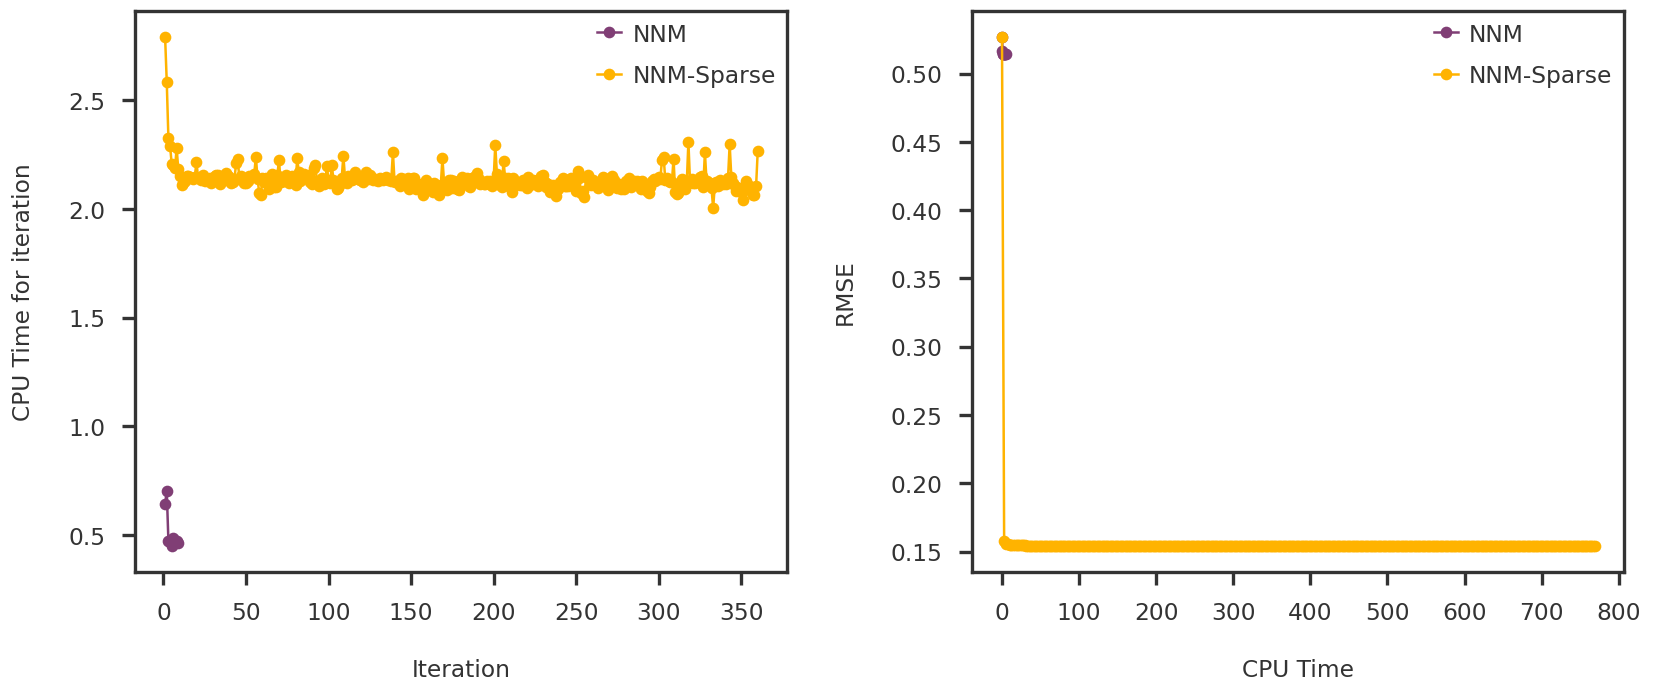

In [9]:
fig = plt.figure(figsize = (14, 6))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

ax1.plot(np.arange(1, len(nnm.steps)), nnm.cpu_time_[1:], 'o-', label = 'NNM')
ax1.plot(np.arange(1, len(nnm_sparse.steps)), nnm_sparse.cpu_time_[1:], 'o-', label = 'NNM-Sparse')
ax1.legend()
ax1.set_xlabel("Iteration")
ax1.set_ylabel("CPU Time for iteration")

ax2.plot(np.cumsum(nnm.cpu_time_), nnm.rmse_, 'o-', label = 'NNM')
ax2.plot(np.cumsum(nnm_sparse.cpu_time_), nnm_sparse.rmse_, 'o-', label = 'NNM-Sparse')
ax2.legend()
ax2.set_xlabel("CPU Time")
ax2.set_ylabel("RMSE")

plt.tight_layout(w_pad = 2.0)
plt.show()